<a href="https://colab.research.google.com/github/Santiago04656/aprendizaje-automatico-252601/blob/main/4_1_Medidas_de_Similitud_SantiagoMaldonado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia  Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [32]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [33]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()


# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [34]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntos en 2D con función normal, alrededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2


In [35]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relación lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b


In [36]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    # coeficientes : array de 3 elementos [a, b, c]
    # Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y


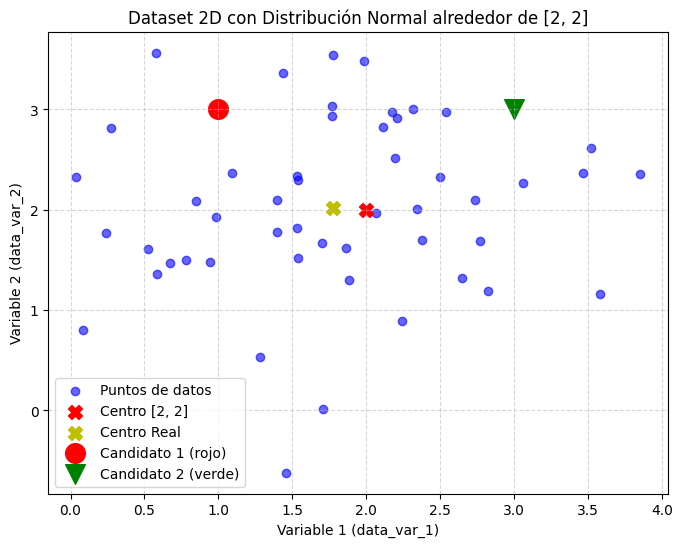

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


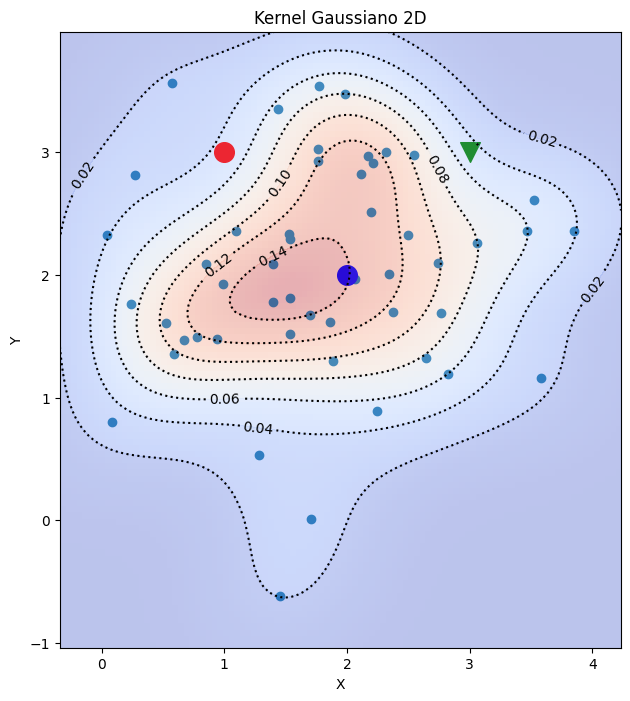

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

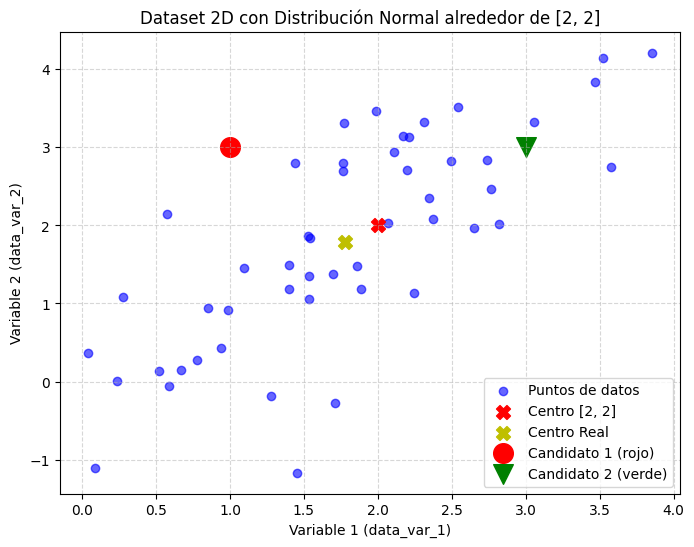

Centro real del cluster: x=1.77, y=1.79
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


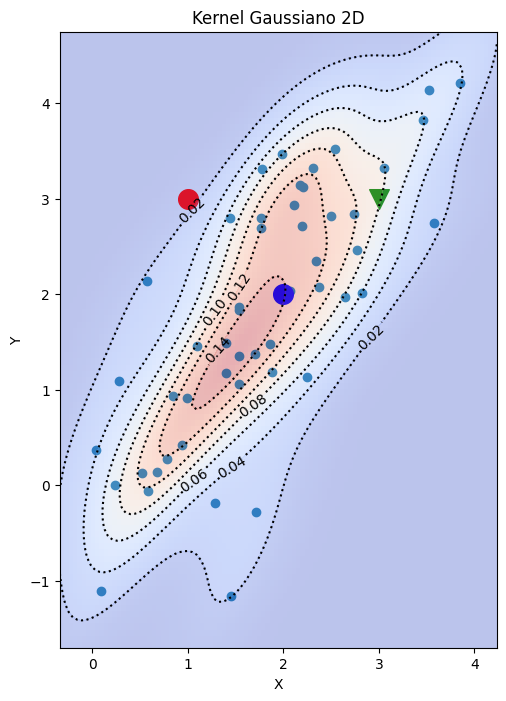

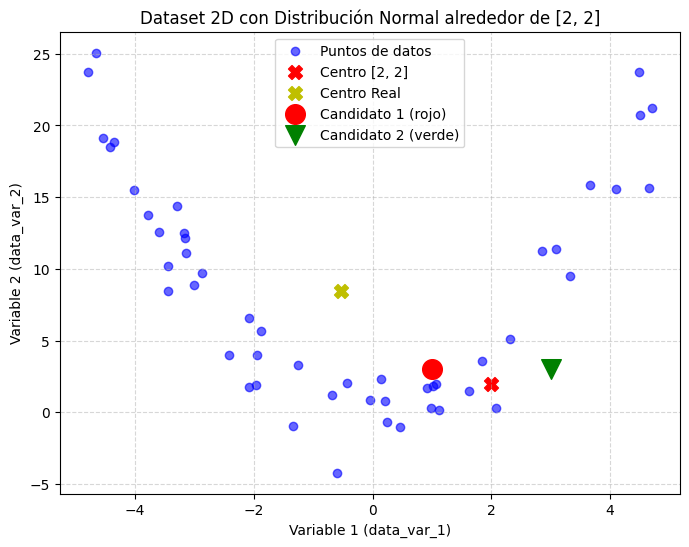

Centro real del cluster: x=-0.54, y=8.46
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


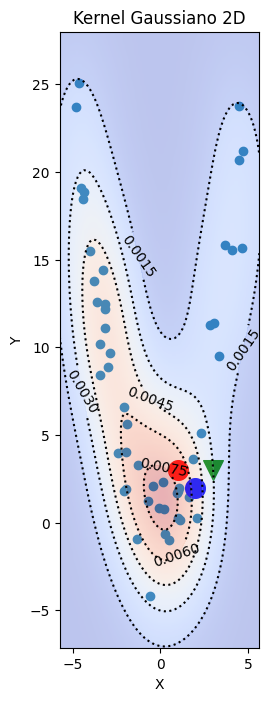

In [10]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points=50, ds_center=np.array([2, 2]))
visualize_scatter(dxr, dyr, ds_center, c1, c2)
visualize_dataset(dxr, dyr, ds_center, c1, c2)

dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]), n_data_points=50, rango_x=(-5, 5))
visualize_scatter(dx2, dy2, ds_center, c1, c2)
visualize_dataset(dx2, dy2, ds_center, c1, c2)

In [11]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [27]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset con distribución normal:\n{np.cov(dx, dy)}')

print(f'Covarianza dataset con relación lineal :\n{np.cov(dxr, dyr)}')

print("-"*100)

print(f'Covarianza dataset con relación lineal Grande:\n{np.cov(dxGrande, dyGrande)}')


print(f'Covarianza dataset con relación cuadratica:\n{np.cov(dx2, dy2)}')


Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]
Covarianza dataset con relación lineal :
[[0.87173739 0.96159229]
 [0.96159229 1.81589137]]
----------------------------------------------------------------------------------------------------
Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]
Covarianza dataset con relación cuadratica:
[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

**¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?**

* Al calcular la Correlación de Pearson, este dataset es el que arroja un valor más cercano a 1 (o -1), indicando que sus puntos se alinean casi perfectamente en una recta, a diferencia del dataset aleatorio (cercano a 0) o el cuadrático (que tiene una relación curva, no lineal).

**¿Cual es el problema que tiene la covarianza?**

* Si mides tus datos en metros tendrás una covarianza pequeña, pero si los mides en centímetros la covarianza será enorme, aunque la relación sea la misma. Esto hace difícil comparar la fuerza de la relación entre diferentes datasets solo viendo la covarianza. (Por eso preferimos la Correlación, que siempre va de -1 a 1).

In [15]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
print(f'Correlación de Pearson dataset con distribución normal:\n{np.corrcoef(dx, dy)}')

print(f'Correlación de Pearson dataset con relación lineal :\n{np.corrcoef(dxr, dyr)}')


print(f'Correlación de Pearson dataset con relación lineal Grande:\n{np.corrcoef(dxGrande, dyGrande)}')


Correlación de Pearson dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]
Correlación de Pearson dataset con relación lineal :
[[1.         0.76428124]
 [0.76428124 1.        ]]
Correlación de Pearson dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

**¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?**

* Al calcular la correlación, este dataset obtiene un valor muy cercano a 1 (o -1), lo que indica que si una variable aumenta, la otra también lo hace en proporción constante.


**¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?**

* Porque siempre tiene un valor entre -1 y +1.

* Esto la hace mucho más fácil de leer que la Covarianza (que puede ser un número gigante o diminuto dependiendo de la escala). Con la correlación, sabes inmediatamente que 0.9 es fuerte y 0.1 es débil, sin importar las unidades de los datos.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [28]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm



In [37]:
def distancia_euclidiana(p1, p2):
   # La distancia euclidiana usa la norma L2 (ord=2)
   dist = np.linalg.norm(p2 - p1, ord=2)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist


In [38]:
def distancia_manhattan(p1, p2):
   # La distancia de Manhattan usa la norma L1 (ord=1)
   dist = np.linalg.norm(p2 - p1, ord=1)
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist


In [39]:
import scipy.spatial.distance as dist_sci

def distancia_chebyshev(p1, p2):
   # La distancia de Chebyshev usa la norma L-infinito (ord=np.inf)
   dist = np.linalg.norm(p2 - p1, ord=np.inf)
   print(f'Distancia chebyshev del punto {p1} al punto {p2} = {dist}')
   return dist

def similitud_coseno(p1, p2):
   # La similitud de coseno es 1 - distancia de coseno
   # scipy.spatial.distance.cosine devuelve la distancia de coseno
   dist = dist_sci.cosine(p1, p2)
   sim = 1 - dist # Convertir distancia a similitud
   print(f'Similitud de coseno del punto {p1} al punto {p2} = {sim}')
   return sim

def distancia_mahalanobis(p1, p2, VI):
   # La distancia de Mahalanobis requiere la inversa de la matriz de covarianza (VI)
   dist = dist_sci.mahalanobis(p1, p2, VI)
   print(f'Distancia de Mahalanobis del punto {p1} al punto {p2} = {dist}')
   return dist

def distancia_jaccard(p1, p2):
   # La distancia de Jaccard se aplica típicamente a vectores binarios o booleanos.
   # Para arrays numéricos, un enfoque común es binarizarlos (no-cero como 1, cero como 0).
   # Asegurar que p1 y p2 sean tratados como arrays 1D para el cálculo de la distancia de Jaccard
   p1_flat = np.asarray(p1).flatten()
   p2_flat = np.asarray(p2).flatten()
   p1_binary = (p1_flat != 0).astype(int)
   p2_binary = (p2_flat != 0).astype(int)

   # Manejar casos donde ambos vectores binarios son todo ceros para evitar NaN
   if np.all(p1_binary == 0) and np.all(p2_binary == 0):
       dist = 0.0 # O 1.0 dependiendo del comportamiento deseado para conjuntos vacíos, aquí asumiendo idénticos
   else:
       dist = dist_sci.jaccard(p1_binary, p2_binary)

   print(f'Distancia de Jaccard del punto {p1} al punto {p2} = {dist}')
   return dist


In [40]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset:\n')
# Calcular el centro del primer dataset (dx, dy)
ds_center_ds1 = np.array([np.mean(dx), np.mean(dy)])
print(f'Centro del primer dataset (dx, dy): {ds_center_ds1}')

# Calcular distancias para el primer dataset
dist_euc1 = distancia_euclidiana(c1, ds_center_ds1)
dist_euc2 = distancia_euclidiana(c2, ds_center_ds1)

dist_man1 = distancia_manhattan(c1, ds_center_ds1)
dist_man2 = distancia_manhattan(c2, ds_center_ds1)

dist_cheby1 = distancia_chebyshev(c1, ds_center_ds1)
dist_cheby2 = distancia_chebyshev(c2, ds_center_ds1)

sim_cos1 = similitud_coseno(c1, ds_center_ds1)
sim_cos2 = similitud_coseno(c2, ds_center_ds1)

# Para Mahalanobis, necesitamos la inversa de la matriz de covarianza del dataset
cov_ds1 = np.cov(np.vstack([dx, dy]))
VI_ds1 = np.linalg.inv(cov_ds1)
dist_maha1 = distancia_mahalanobis(c1, ds_center_ds1, VI_ds1)
dist_maha2 = distancia_mahalanobis(c2, ds_center_ds1, VI_ds1)

# Jaccard distance typically applies to binary or boolean vectors.
# Since c1, c2, and ds_center_ds1 are continuous, we'll binarize them for demonstration.
# For simplicity, we'll consider non-zero elements as 1.
# Flatten them to 1D arrays for Jaccard calculation
dist_jac1 = distancia_jaccard(c1, ds_center_ds1)
dist_jac2 = distancia_jaccard(c2, ds_center_ds1)

print('\nDistancias segundo dataset:\n')
# Calcular el centro del segundo dataset (dxr, dyr)
ds_center_ds2 = np.array([np.mean(dxr), np.mean(dyr)])
print(f'Centro del segundo dataset (dxr, dyr): {ds_center_ds2}')

# Calcular distancias para el segundo dataset
dist_euc1_ds2 = distancia_euclidiana(c1, ds_center_ds2)
dist_euc2_ds2 = distancia_euclidiana(c2, ds_center_ds2)

dist_man1_ds2 = distancia_manhattan(c1, ds_center_ds2)
dist_man2_ds2 = distancia_manhattan(c2, ds_center_ds2)

dist_cheby1_ds2 = distancia_chebyshev(c1, ds_center_ds2)
dist_cheby2_ds2 = distancia_chebyshev(c2, ds_center_ds2)

sim_cos1_ds2 = similitud_coseno(c1, ds_center_ds2)
sim_cos2_ds2 = similitud_coseno(c2, ds_center_ds2)

# Para Mahalanobis, necesitamos la inversa de la matriz de covarianza del dataset
cov_ds2 = np.cov(np.vstack([dxr, dyr]))
VI_ds2 = np.linalg.inv(cov_ds2)
dist_maha1_ds2 = distancia_mahalanobis(c1, ds_center_ds2, VI_ds2)
dist_maha2_ds2 = distancia_mahalanobis(c2, ds_center_ds2, VI_ds2)

# Distancia de Jaccard para el segundo dataset
dist_jac1_ds2 = distancia_jaccard(c1, ds_center_ds2)
dist_jac2_ds2 = distancia_jaccard(c2, ds_center_ds2)


🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

Centro del primer dataset (dx, dy): [1.77452609 2.01778087]
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Distancia chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
Similitud de coseno del punto [1 3] al punto [1.77452609 2.01778087] = 0.9212201531060056
Similitud de coseno del punto [3 3] al punto [1.77452609 2.01778087] = 0.9979490827692092
Distancia de Mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4770847358703076
Distancia de Mahalanobis del punt

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

**¿Qué medidas de disimilitud son de un punto a otro punto?**

* Euclidiana, Manhattan, Chebyshev, Coseno y Jaccard.Por qué: Estas medidas son puramente geométricas; solo necesitan las coordenadas de los dos puntos ($P_1$ y $P_2$) para calcularse. Ignoran por completo la existencia de otros datos alrededor.

**¿Qué medidas de disimilitud son de un punto a una distribución?**

* Distancia de Mahalanobis.

* Por qué aunque mide la distancia entre dos vectores (o un punto y el centro), es dependiente del contexto del grupo. Requiere obligatoriamente la Matriz de Covarianza de todo el dataset para funcionar. Esto quiere decir que  la distancia cambia dependiendo de cómo estén distribuidos los demás datos.

**¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?**

* Sí por qué al utilizar la Matriz de Covarianza Inversa ($S^{-1}$), normaliza los datos eliminando las diferencias de escala y considerando la correlación de la distribución. Esto le permite detectar que un punto puede estar geométricamente lejos pero estadísticamente cerca si sigue la tendencia de la "nube" de datos (como vimos en el dataset lineal con el triángulo verde).

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [41]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    VI = None
    if mC is not None:
        # Calcular la inversa de la matriz de covarianza una sola vez si se proporciona
        VI = np.linalg.inv(mC)

    for pair in it.product(np.arange(n_samples), repeat=2):
        p1_idx, p2_idx = pair
        p1 = X[p1_idx]
        p2 = X[p2_idx]
        if VI is not None and distancia == distancia_mahalanobis:
            mD[pair] = distancia(p1, p2, VI)
        else:
            mD[pair] = distancia(p1, p2)
    return mD


In [42]:
 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# Convertir dx y dy a un formato adecuado para cálculos de distancia (array Nx2)
X = np.vstack([dx, dy]).T

# calculamos primero la matriz de covarianzas
mC = np.cov(dx, dy)

# Calcular la matriz de distancias Euclidiana
Ma_euclidea = matriz_distancias(X, distancia_euclidiana)
print('Matriz distancias Euclidiana:\n', Ma_euclidea)

# Calcular la matriz de distancias Mahalanobis
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias Mahalanobis:\n', Ma_mahalanobis)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.98716888 1.92798988] = 1.5606464882175037
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.31424733 3.0035329 ] = 0.7035232668424994
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.09197592 2.36163603] = 1.4052400675984946
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.5876963  1.35488025] = 2.1409589035824856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.46564877 2.36139561] = 0.9696527461409865
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.7742237  3.53803657] = 1.4126830371074963
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.0675282  1.96417396] = 0.5601212301458185
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.57525181 3.56464366] = 2.287139229829996
Distancia euclidiana del punto [2.49671415 2.32408397] al punt

Text(0.5, 1.0, 'Mahalanobis')

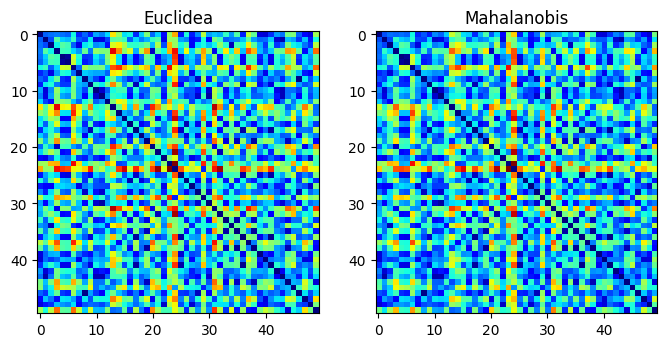

In [23]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [43]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # Convertir distancia a similitud: mayor similitud para menor distancia
    mS = 1 / (1 + mD)
    return mS


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.98716888 1.92798988] = 1.5606464882175037
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.31424733 3.0035329 ] = 0.7035232668424994
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.09197592 2.36163603] = 1.4052400675984946
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.5876963  1.35488025] = 2.1409589035824856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.46564877 2.36139561] = 0.9696527461409865
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.7742237  3.53803657] = 1.4126830371074963
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.0675282  1.96417396] = 0.5601212301458185
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [0.57525181 3.56464366] = 2.287139229829996
Distancia euclidiana del punto [2.49671415 2.32408397] al punt

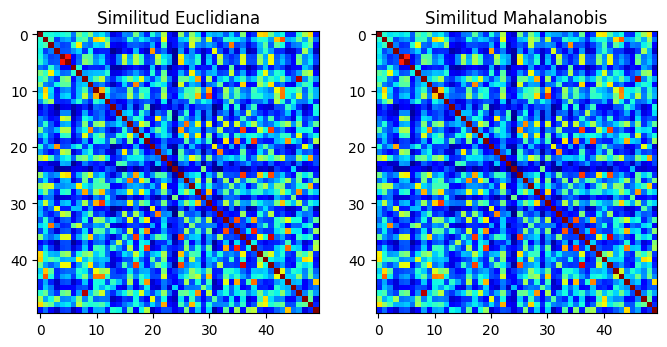

In [44]:
# Complete 4.3 Grafique la matriz de similitud

# Calcular la matriz de similitud euclidiana
Ma_euclidea_sim = matriz_similitud(X, distancia_euclidiana)
print('Matriz de Similitud Euclidiana:\n', Ma_euclidea_sim)

# Calcular la matriz de similitud de Mahalanobis
Ma_mahalanobis_sim = matriz_similitud(X, distancia_mahalanobis, mC)
print('Matriz de Similitud Mahalanobis:\n', Ma_mahalanobis_sim)

# Graficar las matrices de similitud
fig_sim, ax_sim = plt.subplots(1, 2)
ax_sim[0].imshow(Ma_euclidea_sim, cmap='jet')
ax_sim[0].set_title('Similitud Euclidiana')
ax_sim[1].imshow(Ma_mahalanobis_sim, cmap='jet')
ax_sim[1].set_title('Similitud Mahalanobis')
plt.show()


# ✅ **RESULTADOS:**
**¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?**

* El gráfico de Similitud.

* Porque normaliza los valores en un rango estándar de 0 a 1 (o 0 a 100%).

* Es más intuitivo asociar un valor alto (cercano a 1) o un color intenso con una relación fuerte.

* En cambio, en los gráficos de disimilitud (distancia), los rangos pueden ser infinitos (0 a 5000, 0 a 0.5, etc.) y hay que pensar a la inversa ("cero" significa "igual"), lo cual es menos directo visualmente.


# 🚀 ¡TALLER FINALIZADO!"